In [9]:
import pandas as pd
import os
import glob
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import os
from collections import defaultdict
from matplotlib.pyplot import cm
from sklearn.model_selection import train_test_split, StratifiedKFold

import random
import numpy as np
import tensorflow as tf
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
origin_df=pd.read_csv("HPDD_06-13-2016 19-49-43-03_timeSeries.csv")
origin_df

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,1800,1801,1802,1803,1804,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 226
0,Papua New Guinea,853,Gross Government Debt,GGXWDG,Value,NaN,NaN,NaN,NaN,NaN,...,8.565531e+09,1.176576e+10,1.482730e+10,1.580891e+10,1.616781e+10,1.670647e+10,1.667034e+10,1.633275e+10,1.552917e+10,NaN
1,Paraguay,288,Gross Government Debt,GGXWDG,Value,NaN,NaN,NaN,NaN,NaN,...,1.760297e+13,2.096252e+13,2.633586e+13,3.298367e+13,3.828361e+13,4.343323e+13,4.902607e+13,5.462696e+13,6.051216e+13,NaN
2,Peru,293,Gross Government Debt,GGXWDG,Value,NaN,NaN,NaN,NaN,NaN,...,1.077037e+11,1.110170e+11,1.193030e+11,1.350758e+11,1.550643e+11,1.683184e+11,1.783528e+11,1.863985e+11,1.995994e+11,NaN
3,Philippines,566,Gross Government Debt,GGXWDG,Value,NaN,NaN,NaN,NaN,NaN,...,4.288804e+12,4.529800e+12,4.602500e+12,4.853522e+12,5.038158e+12,5.246268e+12,5.472505e+12,5.722527e+12,5.997655e+12,NaN
4,Poland,964,Gross Government Debt,GGXWDG,Value,NaN,NaN,NaN,NaN,NaN,...,8.784150e+11,9.261160e+11,8.665020e+11,9.144117e+11,9.600945e+11,1.011376e+12,1.059549e+12,1.101687e+12,1.146170e+12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Afghanistan,512,Gross Domestic Product,NGDP,Value,NaN,NaN,NaN,NaN,NaN,...,1.033591e+12,1.116827e+12,1.173182e+12,1.172361e+12,1.240498e+12,1.333489e+12,1.468179e+12,1.632525e+12,1.815953e+12,NaN
566,"Micronesia, Fed. States of",868,Gross Domestic Product,NGDP,Value,NaN,NaN,NaN,NaN,NaN,...,3.258838e+08,3.145766e+08,3.080000e+08,3.072572e+08,3.123975e+08,3.211077e+08,3.283643e+08,3.371437e+08,3.452795e+08,NaN
567,"Micronesia, Fed. States of",868,Gross Government Debt,GGXWDG,Value,NaN,NaN,NaN,NaN,NaN,...,9.028973e+07,8.519621e+07,8.296552e+07,8.373773e+07,8.506183e+07,8.372379e+07,9.128237e+07,9.895226e+07,1.063630e+08,NaN
568,"Micronesia, Fed. States of",868,Debt to GDP Ratio,GGXWDG_GDP,Value,NaN,NaN,NaN,NaN,NaN,...,2.770611e+01,2.708282e+01,2.693686e+01,2.725330e+01,2.722872e+01,2.607343e+01,2.779911e+01,2.935018e+01,3.080491e+01,NaN


In [11]:
missing_indicators={}
for (x,y) in zip(origin_df['Country Name'],origin_df['Indicator Name']):
    if x in missing_indicators:
        missing_indicators[x].append(y)
    else:
        missing_indicators[x]=[y]
for i in missing_indicators:
    print(f'{i}:{missing_indicators[i]}\n\n')

Papua New Guinea:['Gross Government Debt', 'Debt to GDP Ratio', 'Gross Domestic Product']


Paraguay:['Gross Government Debt', 'Debt to GDP Ratio', 'Gross Domestic Product']


Peru:['Gross Government Debt', 'Debt to GDP Ratio', 'Gross Domestic Product']


Philippines:['Gross Government Debt', 'Debt to GDP Ratio', 'Gross Domestic Product']


Poland:['Gross Government Debt', 'Debt to GDP Ratio', 'Gross Domestic Product']


Portugal:['Gross Government Debt', 'Debt to GDP Ratio', 'Gross Domestic Product']


Qatar:['Gross Government Debt', 'Debt to GDP Ratio', 'Gross Domestic Product']


Romania:['Gross Government Debt', 'Debt to GDP Ratio', 'Gross Domestic Product']


Russia:['Gross Government Debt', 'Gross Domestic Product', 'Debt to GDP Ratio']


Rwanda:['Gross Government Debt', 'Gross Domestic Product', 'Debt to GDP Ratio']


Samoa:['Gross Government Debt', 'Gross Domestic Product', 'Debt to GDP Ratio']


San Marino:['Gross Government Debt', 'Debt to GDP Ratio', 'Gross Domestic Product'

In [12]:
countries = origin_df['Country Name'].unique()
indicators = origin_df['Indicator Name'].unique()

nan_filling_list = [None] * 221
data_frames = {}
for country in countries: 
    temp_df = origin_df[(origin_df['Country Name'] == country) & 
                        ((origin_df['Indicator Name'] == 'Gross Government Debt') |
                         (origin_df['Indicator Name'] == 'Gross Domestic Product') |
                         (origin_df['Indicator Name'] == 'Debt to GDP Ratio'))]
    temp_df = temp_df[['Country Name','Indicator Name']].join(temp_df.loc[:,'1800':'2020'])
    
    if len(temp_df.index) < 3:
        for missing_indicator in missing_indicators[country]:
            index = random.randint(1,1000) # possible collision on index 
            temp_df.loc[index] = [country]+[missing_indicator]+nan_filling_list
    temp_df = temp_df.melt(id_vars=['Country Name','Indicator Name'], 
        var_name='Year', 
        value_name='Value')
    temp_df = temp_df.pivot_table('Value', ['Country Name', 'Year'], 'Indicator Name', dropna=False)
    
    #after pivoting need to reshape in standard form!
    flattened = pd.DataFrame(temp_df.to_records())
    data_frames[country] = flattened
merged_df = pd.concat(data_frames.values()).reset_index(drop=True)
final_df = merged_df[['Country Name','Year','Gross Government Debt','Gross Domestic Product','Debt to GDP Ratio']]
final_df

,Country Name,Year,Gross Government Debt,Gross Domestic Product,Debt to GDP Ratio
0,Papua New Guinea,1800,NaN,NaN,NaN
1,Papua New Guinea,1801,NaN,NaN,NaN
2,Papua New Guinea,1802,NaN,NaN,NaN
3,Papua New Guinea,1803,NaN,NaN,NaN
4,Papua New Guinea,1804,NaN,NaN,NaN
...,...,...,...,...,...
42648,"Micronesia, Fed. States of",2016,8.506183e+07,3.123975e+08,27.228716
42649,"Micronesia, Fed. States of",2017,8.372379e+07,3.211077e+08,26.073430
42650,"Micronesia, Fed. States of",2018,9.128237e+07,3.283643e+08,27.799111
42651,"Micronesia, Fed. States of",2019,9.895226e+07,3.371437e+08,29.350176


In [13]:
final_df['Year']=final_df['Year'].astype('int32')

In [14]:
final_df.dtypes

Country Name               object
Year                        int32
Gross Government Debt     float64
Gross Domestic Product    float64
Debt to GDP Ratio         float64
dtype: object

In [15]:
balkan=['Albania', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Kosovo','Montenegro, Rep. of', 'FYR Macedonia ', 'Romania', 'Serbia','Slovak Republic','Ukraine','Turkey','Poland','Greece','United States']
len(balkan)

15

In [16]:
nova=[]
for i in final_df.iloc:
    if i[0] in balkan and i[1]>1979: 
        nova.append(i)

In [17]:
nova=pd.DataFrame(nova).reset_index()
nova=nova.drop(columns='index')

In [18]:
nova.head()

,Country Name,Year,Gross Government Debt,Gross Domestic Product,Debt to GDP Ratio
0,Poland,1980,NaN,2.503505e+08,NaN
1,Poland,1981,NaN,2.744165e+08,NaN
2,Poland,1982,NaN,5.529405e+08,NaN
3,Poland,1983,NaN,6.903431e+08,NaN
4,Poland,1984,NaN,8.550426e+08,NaN


In [19]:
nova=nova.replace({np.NaN:0})
for i in range(len(nova)):
    if nova.loc[i][2]!=0 and nova.loc[i][3]!=0 and nova.loc[i][4]==0:
        val=(nova.loc[i][2] / nova.loc[i][3])*100
        nova.loc[i,['Debt to GDP Ratio']]=val
    elif nova.loc[i][2]!=0 and nova.loc[i][3]==0 and nova.loc[i][4]!=0:
        val=(nova.loc[i][2] / nova.loc[i][4])*100
        nova.loc[i,['Gross Domestic Product']]=val
    elif nova.loc[i][2]==0 and nova.loc[i][3]!=0 and nova.loc[i][4]!=0:
        val=(nova.loc[i][3] * nova.loc[i][4])/100
        nova.loc[i,['Gross Government Debt']]=val
nova=nova.replace({0:np.NaN})

In [20]:
#columns = ['Gross Government Debt', 'Gross Domestic Product','Debt to GDP Ratio']
columns = [ 'Gross Domestic Product','Debt to GDP Ratio']
for i in nova['Country Name'].unique():
    vrednost=0
    for j in columns:
        flag=nova[nova['Country Name']==i][j].isna().sum()
        vrednost=nova[~(nova[j].isna())&(nova['Country Name']==i)][j].sum()/(len(nova[nova['Country Name']==i])-flag)
        print((len(nova[nova['Country Name']==i])-flag),nova[~(nova[j].isna())&(nova['Country Name']==i)][j].sum())
        print('-----',vrednost)
        nova.loc[nova['Country Name']==i,j]=nova.loc[nova['Country Name']==i,j].fillna(vrednost)

41 33515777155181.004
----- 817457979394.6587
35 1862.9930475440422
----- 53.228372786972635
41 10855904596934.537
----- 264778160900.84238
31 809.9368151270481
----- 26.12699403635639
24 62937676576390.625
----- 2622403190682.943
21 1467.875860689657
----- 69.89885050903129
41 445114163092739.3
----- 10856443002261.934
41 2949.3892669888073
----- 71.93632358509286
29 10496854466426.33
----- 361960498842.28723
26 888.0601162802941
----- 34.15615831847285
27 533859682999.3192
----- 19772580851.826637
23 861.3437160570414
----- 37.44972678508876
41 1482308492911.0864
----- 36153865680.75821
29 1763.5738411209713
----- 60.812891073136946
21 95526137444.81664
----- 4548863687.848412
15 329.5641699063617
----- 21.970944660424113
29 7251786987589.202
----- 250061620261.69662
27 1444.4633560202697
----- 53.498642815565546
28 1527698282068.5576
----- 54560652931.01991
29 1199.7591541740048
----- 41.37100531634499
41 27706830769413.895
----- 675776360229.6072
27 1719.5388530743733
----- 63.6866

In [21]:
nova=nova.replace({np.NaN:0})

In [22]:
#za proverka pred i po potpolnuvanje na vrednosti
# tuka se pecatat site redovi koi imaat 2 od 3 indikatori
krr=0
for i in range(len(nova)):
    if nova.loc[i][2]!=0 and nova.loc[i][3]!=0 and nova.loc[i][4]==0:
        print(nova.loc[i])
        #print('Fali DTP')
        krr+=1
    elif nova.loc[i][2]!=0 and nova.loc[i][3]==0 and nova.loc[i][4]!=0:
        print(nova.loc[i])
        krr+=1
        #print('Fali GDP')
    elif nova.loc[i][2]==0 and nova.loc[i][3]!=0 and nova.loc[i][4]!=0:
        print(nova.loc[i])
        krr+=1
        #print('Fali GGD')
print(krr)

Country Name                        Poland
Year                                  1980
Gross Government Debt                  0.0
Gross Domestic Product    250350486.228868
Debt to GDP Ratio                53.228373
Name: 0, dtype: object
Country Name                        Poland
Year                                  1981
Gross Government Debt                  0.0
Gross Domestic Product    274416519.475442
Debt to GDP Ratio                53.228373
Name: 1, dtype: object
Country Name                        Poland
Year                                  1982
Gross Government Debt                  0.0
Gross Domestic Product    552940513.762361
Debt to GDP Ratio                53.228373
Name: 2, dtype: object
Country Name                        Poland
Year                                  1983
Gross Government Debt                  0.0
Gross Domestic Product    690343144.739843
Debt to GDP Ratio                53.228373
Name: 3, dtype: object
Country Name                        Poland
Year 

Country Name              Bosnia and Herzegovina
Year                                        1980
Gross Government Debt                        0.0
Gross Domestic Product        19772580851.826637
Debt to GDP Ratio                      37.449727
Name: 205, dtype: object
Country Name              Bosnia and Herzegovina
Year                                        1981
Gross Government Debt                        0.0
Gross Domestic Product        19772580851.826637
Debt to GDP Ratio                      37.449727
Name: 206, dtype: object
Country Name              Bosnia and Herzegovina
Year                                        1982
Gross Government Debt                        0.0
Gross Domestic Product        19772580851.826637
Debt to GDP Ratio                      37.449727
Name: 207, dtype: object
Country Name              Bosnia and Herzegovina
Year                                        1983
Gross Government Debt                        0.0
Gross Domestic Product        19772580851.8

Name: 305, dtype: object
Country Name                         Kosovo
Year                                   1999
Gross Government Debt                   0.0
Gross Domestic Product    4548863687.848412
Debt to GDP Ratio                 21.970945
Name: 306, dtype: object
Country Name                        Kosovo
Year                                  2000
Gross Government Debt                  0.0
Gross Domestic Product    2417199981.57738
Debt to GDP Ratio                21.970945
Name: 307, dtype: object
Country Name                        Kosovo
Year                                  2001
Gross Government Debt                  0.0
Gross Domestic Product    2830700010.28841
Debt to GDP Ratio                21.970945
Name: 308, dtype: object
Country Name                       Kosovo
Year                                 2002
Gross Government Debt                 0.0
Gross Domestic Product    2861610415.1951
Debt to GDP Ratio               21.970945
Name: 309, dtype: object
Country Name   

Name: 454, dtype: object
Country Name              Montenegro, Rep. of
Year                                     1984
Gross Government Debt                     0.0
Gross Domestic Product      2863441140.548724
Debt to GDP Ratio                   54.387046
Name: 455, dtype: object
Country Name              Montenegro, Rep. of
Year                                     1985
Gross Government Debt                     0.0
Gross Domestic Product      2863441140.548724
Debt to GDP Ratio                   54.387046
Name: 456, dtype: object
Country Name              Montenegro, Rep. of
Year                                     1986
Gross Government Debt                     0.0
Gross Domestic Product      2863441140.548724
Debt to GDP Ratio                   54.387046
Name: 457, dtype: object
Country Name              Montenegro, Rep. of
Year                                     1987
Gross Government Debt                     0.0
Gross Domestic Product      2863441140.548724
Debt to GDP Ratio         

In [23]:
# tuka se presmetuva tretiot indikator vrz osnova na ostanatite 2
for i in range(len(nova)):
    if nova.loc[i][2]!=0 and nova.loc[i][3]!=0 and nova.loc[i][4]==0:
        val=(nova.loc[i][2] / nova.loc[i][3])*100
        nova.loc[i,['Debt to GDP Ratio']]=val
    elif nova.loc[i][2]!=0 and nova.loc[i][3]==0 and nova.loc[i][4]!=0:
        val=(nova.loc[i][2] / nova.loc[i][4])*100
        nova.loc[i,['Gross Domestic Product']]=val
    elif nova.loc[i][2]==0 and nova.loc[i][3]!=0 and nova.loc[i][4]!=0:
        val=(nova.loc[i][3] * nova.loc[i][4])/100
        nova.loc[i,['Gross Government Debt']]=val

In [24]:
for i in range(len(nova)):
    if nova.loc[i][2]!=0 and nova.loc[i][3]!=0 and nova.loc[i][4]==0:
        print(nova.loc[i])
        #print('Fali DTP')
    elif nova.loc[i][2]!=0 and nova.loc[i][3]==0 and nova.loc[i][4]!=0:
        print(nova.loc[i])
        #print('Fali GDP')
    elif nova.loc[i][2]==0 and nova.loc[i][3]!=0 and nova.loc[i][4]!=0:
        print(nova.loc[i])
        #print('Fali GGD')

In [25]:
nova=nova.replace({0:np.NaN})

In [26]:
data_frames={}
for i in balkan:
    data_frames[i] = pd.DataFrame(nova[nova['Country Name']==i].to_records()).drop(columns='index')

## Financial crisis of 2007–2008

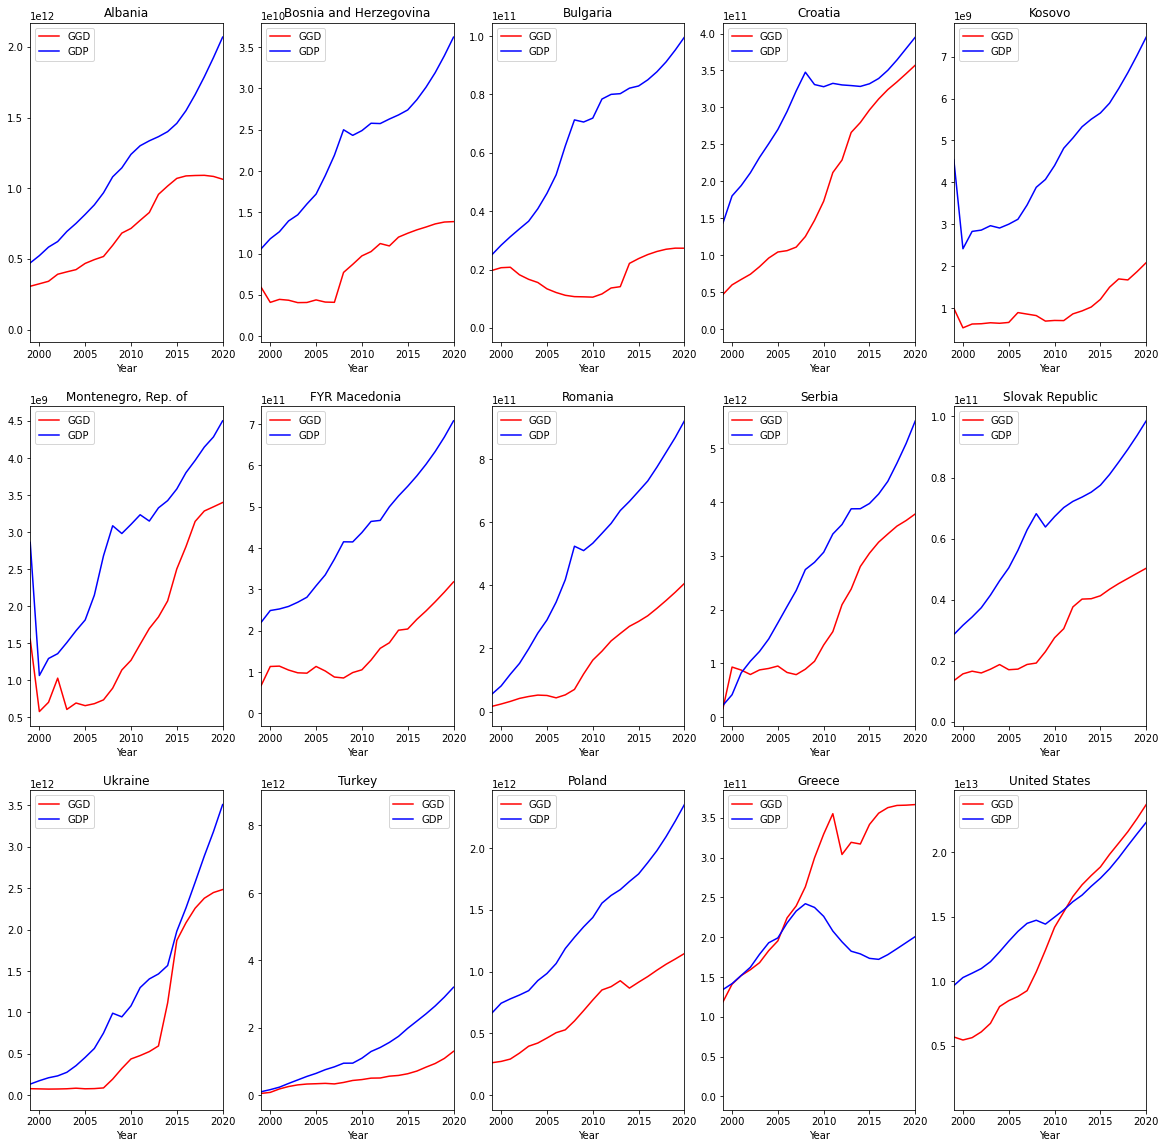

In [27]:
fig=plt.figure(figsize=(20,20))
for idx, i in enumerate(balkan):
    ax =fig.add_subplot(3,5,idx+1)
    data_frames[i].plot(x='Year',y='Gross Government Debt',kind='line', color='red' ,legend=i,ax=ax)
    data_frames[i].plot(x='Year',y='Gross Domestic Product',kind='line',  color='blue',ax=ax)
    ax.legend(['GGD','GDP'])
    #plt.title(i)
    ax.set_title(i)
    ax.set_xlim([1999,2020])

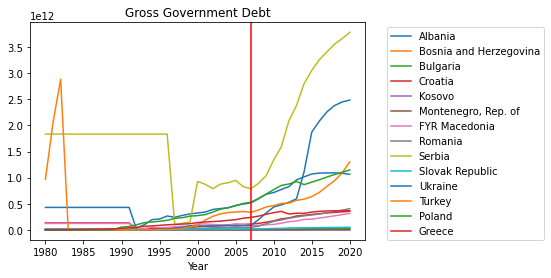

In [32]:
balkan_country=[]
n=len(balkan)
color = iter(cm.rainbow(np.linspace(0, 1, 10)))

for i in range(len(balkan)-1):
    if i==0:
        balkan_country.append(data_frames[balkan[i]].plot(x='Year',y='Gross Government Debt',kind='line',label=balkan[i]))
    else:
        balkan_country.append(data_frames[balkan[i]].plot(x='Year',y='Gross Government Debt',kind='line', ax=balkan_country[i-1],label=balkan[i]))
    #c = next(color)
#plt.xlim([1999,2020])
plt.title('Gross Government Debt')
plt.axvline(x = 2007, color = 'r')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.rcParams["figure.figsize"] = (10,5)

## The 2008 financial crisis began with cheap credit and lax lending standards that fueled a housing bubble, the crisis sparked the Great Recession,The recession was a significant precondition for the European debt crisis.



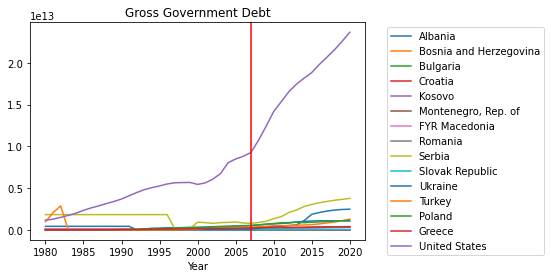

In [33]:
balkan_country=[]
n=len(balkan)
color = iter(cm.rainbow(np.linspace(0, 1, 10)))

for i in range(len(balkan)):
    if i==0:
        balkan_country.append(data_frames[balkan[i]].plot(x='Year',y='Gross Government Debt',kind='line',label=balkan[i]))
    else:
        balkan_country.append(data_frames[balkan[i]].plot(x='Year',y='Gross Government Debt',kind='line', ax=balkan_country[i-1],label=balkan[i]))
    #c = next(color)
#plt.xlim([1999,2020])
plt.title('Gross Government Debt')
plt.axvline(x = 2007, color = 'r')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.rcParams["figure.figsize"] = (10,5)

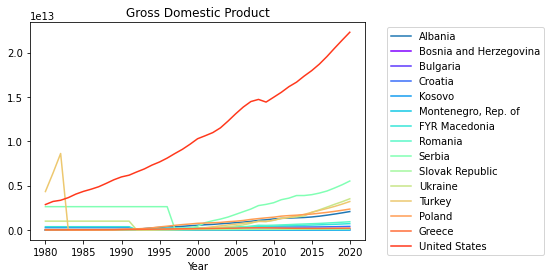

In [34]:
balkan_country=[]
n=len(balkan)
color = iter(cm.rainbow(np.linspace(0, 1, n)))

for i in range(len(balkan)):
    if i==0:
        balkan_country.append(data_frames[balkan[i]].plot(x='Year',y='Gross Domestic Product',kind='line',label=balkan[i]))
    else:
        balkan_country.append(data_frames[balkan[i]].plot(x='Year',y='Gross Domestic Product',kind='line', ax=balkan_country[i-1],color=c,label=balkan[i]))
    c = next(color)
    #plt.xlim([190,220])
#plt.xlim([1990,2020])
plt.title('Gross Domestic Product')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

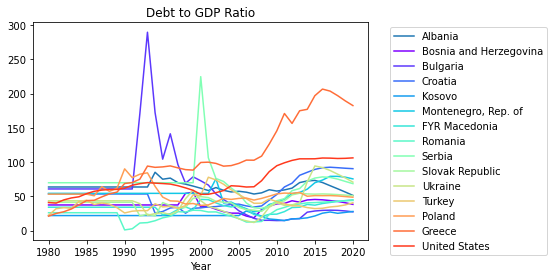

In [35]:
balkan_country=[]
n=len(balkan)
color = iter(cm.rainbow(np.linspace(0, 1, n)))

for i in range(len(balkan)):
    if i==0:
        balkan_country.append(data_frames[balkan[i]].plot(x='Year',y='Debt to GDP Ratio',kind='line',label=balkan[i]))
    else:
        balkan_country.append(data_frames[balkan[i]].plot(x='Year',y='Debt to GDP Ratio',kind='line', ax=balkan_country[i-1],color=c,label=balkan[i]))
    c = next(color)
    #plt.xlim([190,220])

plt.title('Debt to GDP Ratio')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

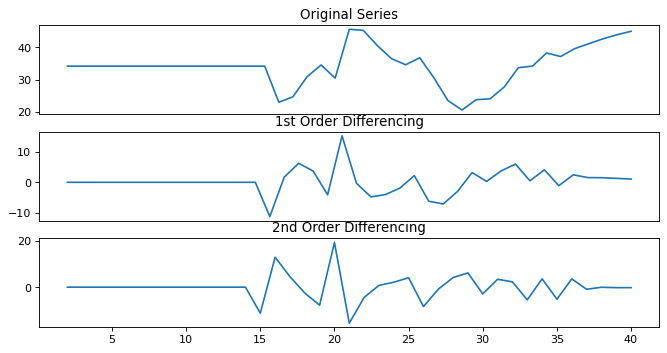

In [36]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':80})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data_frames['FYR Macedonia ']['Debt to GDP Ratio']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data_frames['FYR Macedonia ']['Debt to GDP Ratio'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data_frames['FYR Macedonia ']['Debt to GDP Ratio'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()


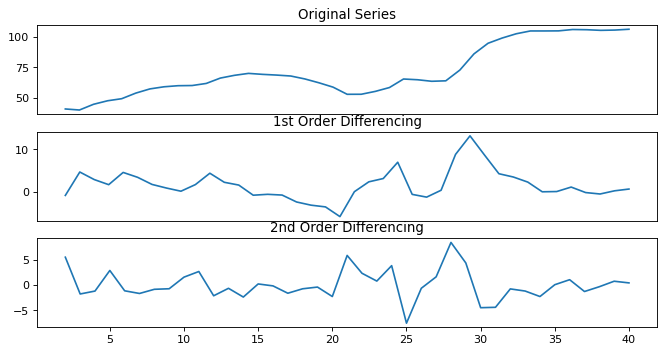

In [37]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':80})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data_frames['United States']['Debt to GDP Ratio']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data_frames['United States']['Debt to GDP Ratio'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data_frames['United States']['Debt to GDP Ratio'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()


''

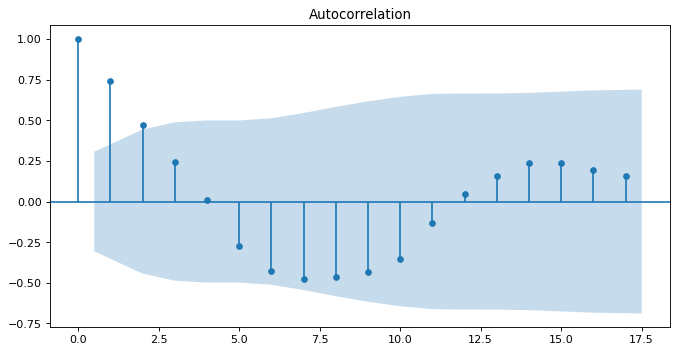

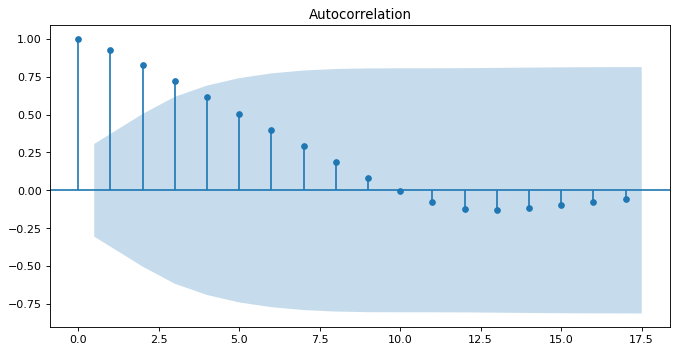

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_frames['FYR Macedonia ']['Debt to GDP Ratio'])

plot_acf(data_frames['United States']['Debt to GDP Ratio'])
''

In [76]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

lista_modeli={}
for i in balkan:
    tekovna_drzava=nova[nova['Country Name']==i]['Debt to GDP Ratio'].values
    avg_model=0
    print(i)
    for x in range(1,6):
        for y in range(1,6):
            n=38
            arimamodel=ARIMA(tekovna_drzava[:n],order=(x,y,2))
            model=arimamodel.fit()
            ypred=pd.Series(model.forecast(3))
            #print(f'ypred:\n{ypred}\nrealni:{tekovna_drzava[n:]}\n\n')
            uslov=tekovna_drzava[n-1:].sum()/len(tekovna_drzava[n-1:])
            pr=ypred.sum()/len(ypred)
            if abs(pr-uslov)< abs(avg_model-uslov):
                print(uslov,'-----',pr)
                avg_model=pr
                lista_modeli[i]=model


Albania
58.58131060819441 ----- 65.95057295988813
58.58131060819441 ----- 57.19003180699129
58.58131060819441 ----- 58.78107184415989
Bosnia and Herzegovina
41.3594960507031 ----- 42.346378283381206
41.3594960507031 ----- 42.17246091068447
41.3594960507031 ----- 41.6108986719107
Bulgaria
28.87446519376095 ----- 27.665340834940405
28.87446519376095 ----- 28.394511616441196
28.87446519376095 ----- 28.802923728423426
Croatia
91.46007778878946 ----- 95.39850576195043
91.46007778878946 ----- 94.21279778856199
91.46007778878946 ----- 93.9156778036385
91.46007778878946 ----- 93.3139250371567
91.46007778878946 ----- 92.25911094129656
Kosovo
26.76518325062865 ----- 27.7312780147919
26.76518325062865 ----- 27.476513175754988
Montenegro, Rep. of
77.9959927026135 ----- 82.84319747471928
77.9959927026135 ----- 80.75374455493808
FYR Macedonia 
43.12268033020005 ----- 40.854194319838406
43.12268033020005 ----- 41.483918202718456
43.12268033020005 ----- 42.39826574945051
43.12268033020005 ----- 42.859

In [29]:
len(lista_modeli),len(balkan)

(15, 15)

In [77]:
lista_modeli['Albania'].forecast(3)

array([62.76418768, 58.69406598, 54.88496188])

In [78]:
data_frames['Albania']['Debt to GDP Ratio'][38:]

38    61.032037
39    56.306190
40    51.410504
Name: Debt to GDP Ratio, dtype: float64

In [81]:
predicted = pd.DataFrame(columns=nova.columns)
for i in balkan:
    ypred=lista_modeli[i].forecast(5)
    for j in range(1,6):
        vmetni = [i,2020+j, np.NaN, np.NaN,ypred[j-1]]
        predicted.loc[len(predicted)] = vmetni

pred={}
for i in balkan:
    pred[i] = pd.DataFrame(predicted[predicted['Country Name']==i].to_records()).drop(columns='index')

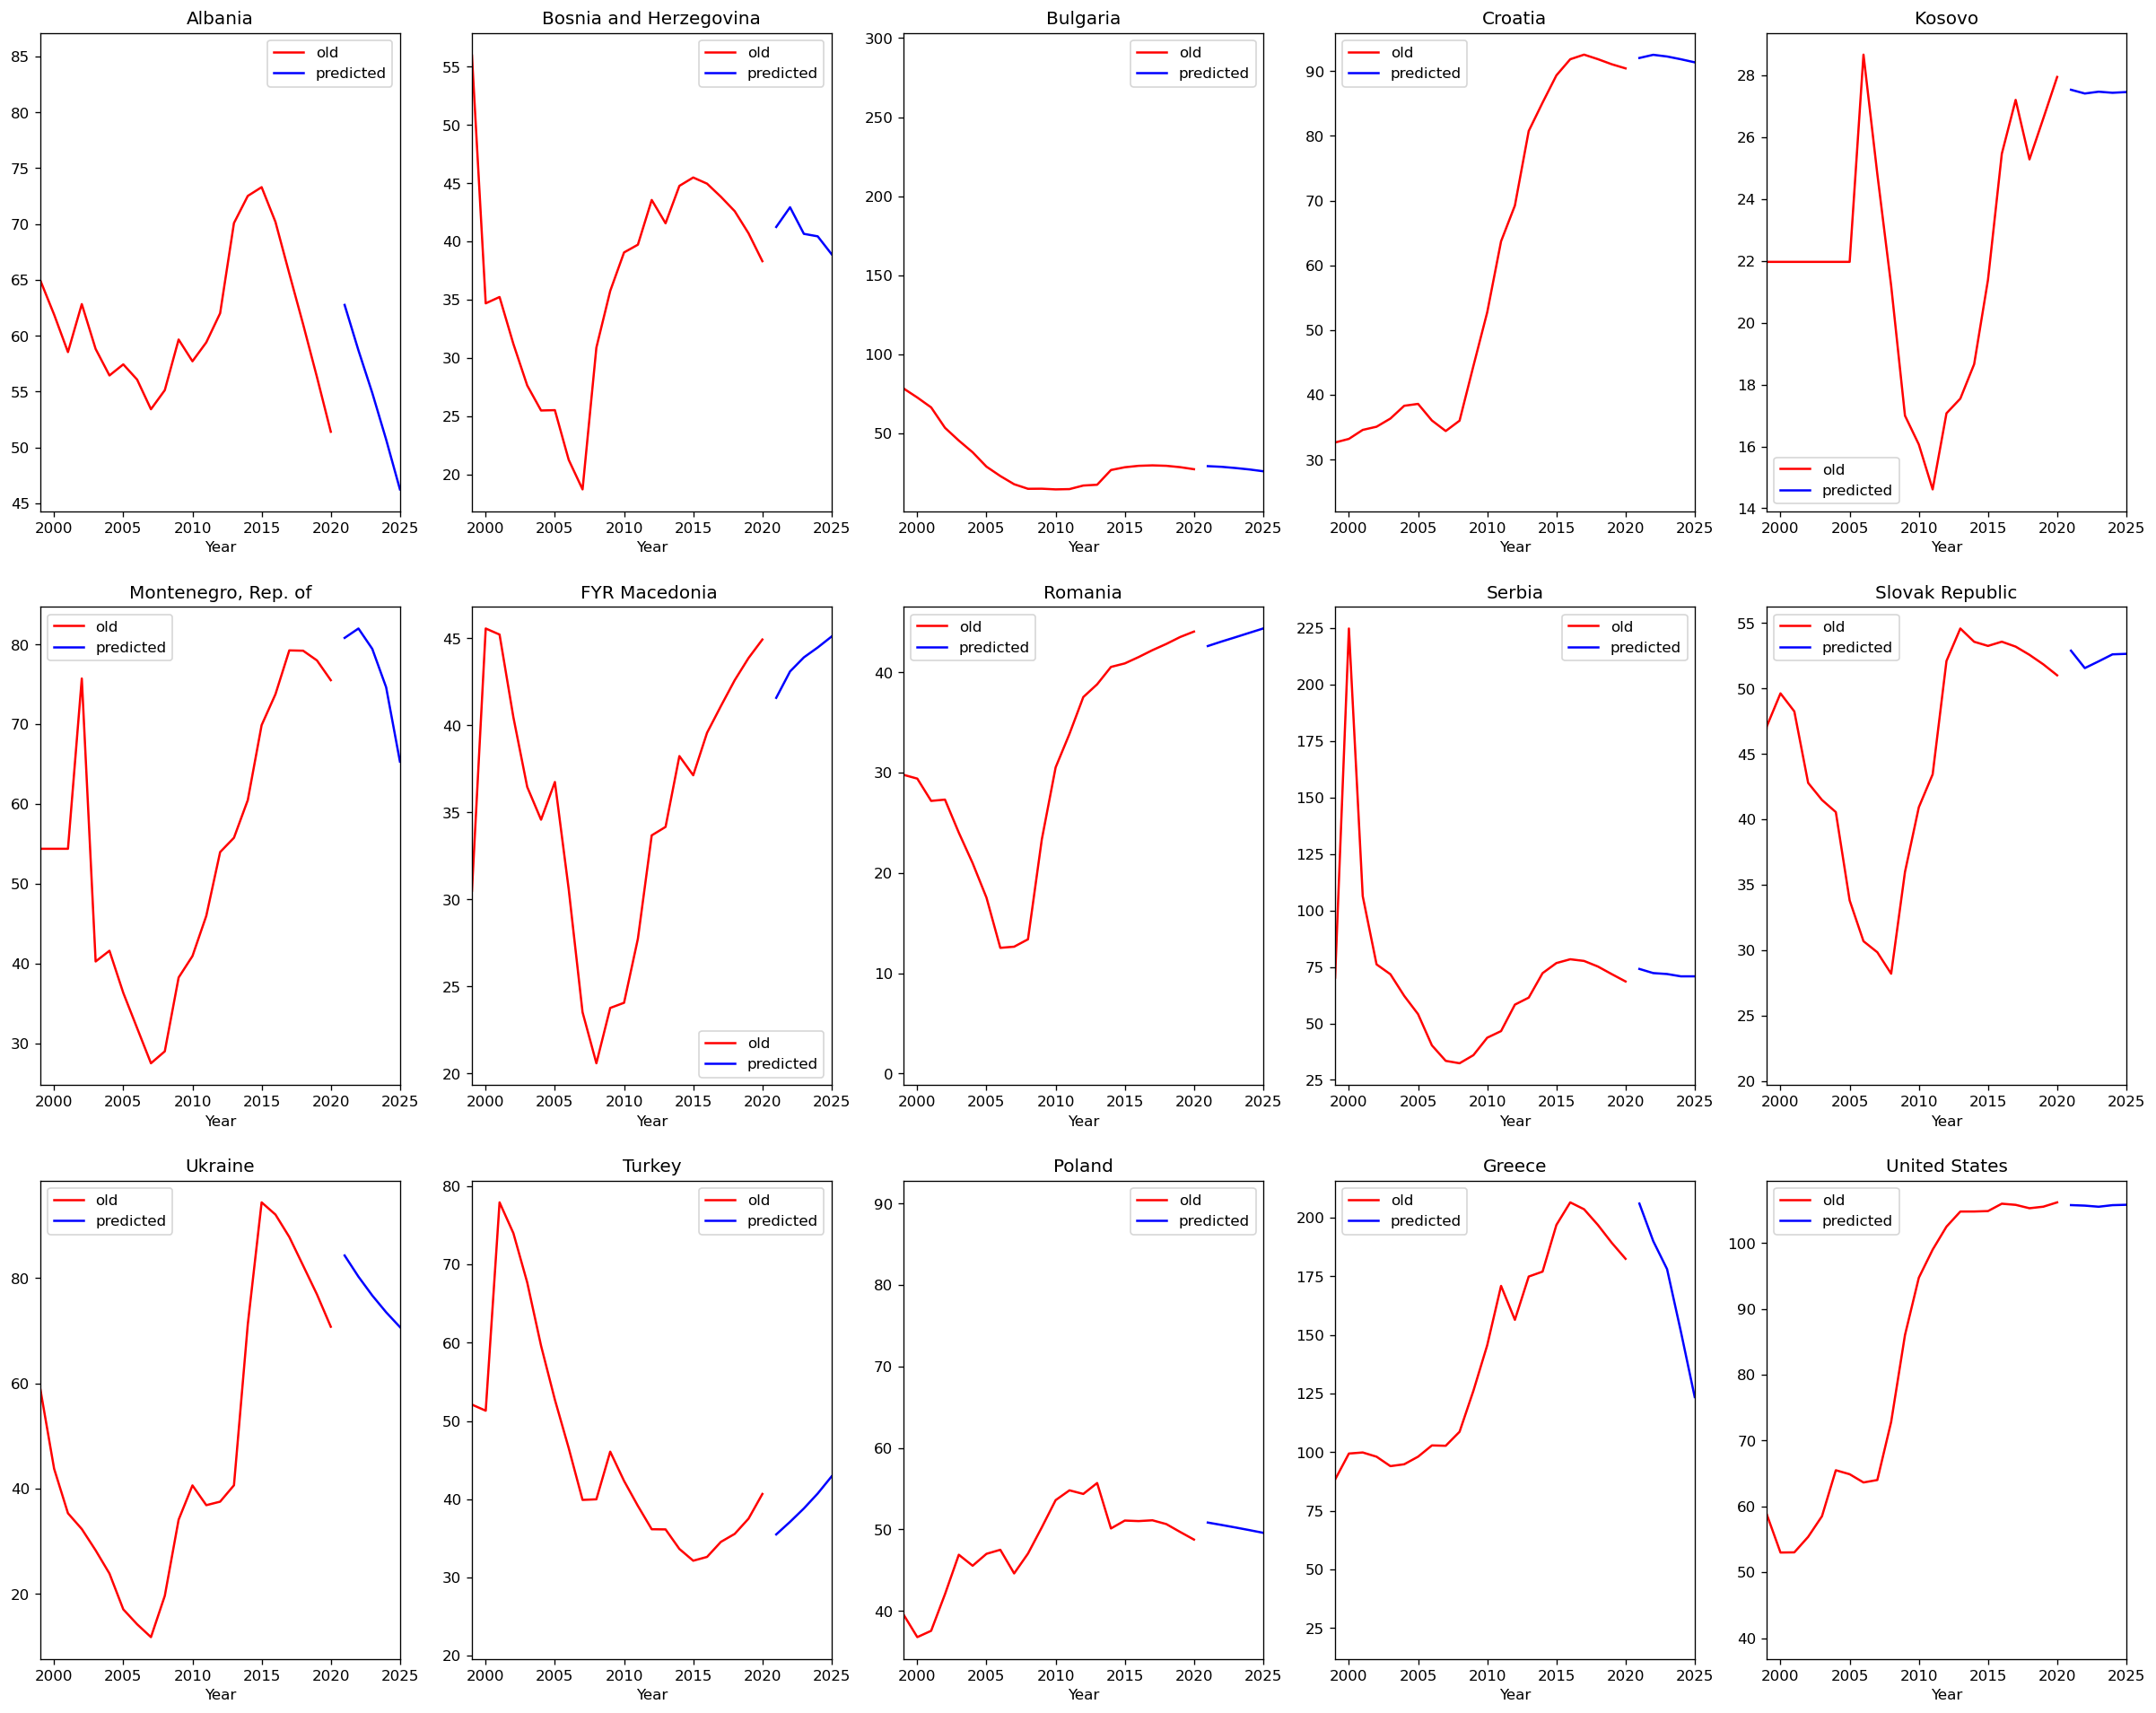

In [83]:
fig=plt.figure(figsize=(25,20))
for idx, i in enumerate(balkan):  
    ax =fig.add_subplot(3,5,idx+1)
    data_frames[i].plot(x='Year',y='Debt to GDP Ratio',kind='line', color='red' ,legend=i,ax=ax)
    pred[i].plot(x='Year',y='Debt to GDP Ratio',kind='line', ax=ax, color='blue')
    ax.legend(['old','predicted'])
    ax.set_title(i)
    ax.set_xlim([1999,2025])